<a href="https://colab.research.google.com/github/Lucas-Andrade-Projetos/codes-deduction-Universal-gas-constant/blob/main/Artigo_Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
#Bibliotecas usadas
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

#Variáveis e Listas
#Temp ambiente
temp_amb = 28
err_temp = 0.5
#Volume
list_vol = np.array([15.8, 14.8, 13.3, 12.4, 11.5, 10.8, 9.9, 9.0, 8.5]) # valores medidos de Volume
err_vol = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]) # seus respectivos erros de medida
#Pressão
list_ps = np.array([0.050, 0.100, 0.150, 0.200, 0.250, 0.300, 0.350, 0.400, 0.450]) # valores medidos de pressão
err_ps = np.array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005]) # seus respectivos erros de medida

#Correção de volume medido + 9.5ml referente  ao  volume  não  considerado  pela  medida.
#Esse  volume  corresponde  ao  ar  presente  nas  mangueiras  e  manômetros  dos kits.

#Corrigindo os valores do volume(única função fora do espaço dedicado para funções)
def somar_nove(lista):
    lista_nova = []  # Lista para armazenar os novos valores
    for valor in lista:
        novo_valor = valor + 9.5
        lista_nova.append(novo_valor)
    return lista_nova
#chamando função para inserção de valores novos corrigidos
list_vol = somar_nove(list_vol)

#Visualização simplificada dos dados adicionados em formato de dataframe pela biblioteca Pandas
df = pd.DataFrame(data = {'Pressão Manométrica em kgf/cm²':list_ps, 'Erro Pressão Manométrica em kgf/cm²'
:err_ps, 'Volume em ml':list_vol, 'Erro Volume em ml':err_vol })

df

,Pressão Manométrica em kgf/cm²,Erro Pressão Manométrica em kgf/cm²,Volume em ml,Erro Volume em ml
0,0.05,0.005,25.3,0.5
1,0.10,0.005,24.3,0.5
2,0.15,0.005,22.8,0.5
3,0.20,0.005,21.9,0.5
4,0.25,0.005,21.0,0.5
5,0.30,0.005,20.3,0.5
6,0.35,0.005,19.4,0.5
7,0.40,0.005,18.5,0.5
8,0.45,0.005,18.0,0.5


In [124]:
#Funções
def volume_invertido(lista):
    # Converter a lista em um array do NumPy
    volumes = np.array(lista)

    # Calcular o inverso dos volumes
    inverso_volumes = np.reciprocal(volumes)

    return inverso_volumes

#Erro do Inverso de Volume
def err_invertido(v, erro_v):
  erro_v = np.array(erro_v)
  v = np.array(v)
  # Cálculo do erro do inverso de volume usando a fórmula de propagação de erros
  erroV_invertida = np.abs(erro_v / (v**2))

  return erroV_invertida

#Função MMQ
def MMQ(x, y, sigma):
  # Cálculo das somatórias com NumPy
  sigma2_soma = np.sum(1/sigma**2)
  x_soma = 1/sigma2_soma * np.sum( x/sigma**2)
  x2_soma = 1/sigma2_soma * np.sum( x**2/sigma**2)
  y_soma = 1/sigma2_soma * np.sum( y/sigma**2)
  xy_soma = 1/sigma2_soma * np.sum( x*y/sigma**2 )
  # Cálculo de a e b
  a = (x_soma * y_soma - xy_soma) / (x_soma**2 - x2_soma)
  b = y_soma - a * x_soma

  # Cálculo das incertezas de a e b
  erro_a = ((1/sigma2_soma) / (x2_soma - x_soma**2))**0.5
  erro_b = ((x2_soma / sigma2_soma) / (x2_soma - x_soma**2))**0.5

  return a, b, erro_a, erro_b

#Função Prever Pressão atm
def p_atm(valor, a, b):
    #usando a equação da reta para prever o valor da pressão manometrica para valores muito grandes de volume
    patm = (a*1/valor) - b

    return patm

In [113]:
#Main code parte 1
recip_vol = volume_invertido(list_vol)
err_recipv = err_invertido(list_vol, err_vol)


#adicionando as linhas novas no Data Frame
df['Volume^-1 em ml'] = recip_vol
df['erro de Volume^-1 em ml'] = err_recipv
display(df)

#Correlação
correlacao = df['Volume^-1 em ml'].corr(df['Pressão Manométrica em kgf/cm²'])
print()
print('Correlações entre os valores de Volume^-1 em ml e Pressão Manométrica em kgf/cm²: ',correlacao)


,Pressão Manométrica em kgf/cm²,Erro Pressão Manométrica em kgf/cm²,Volume em ml,Erro Volume em ml,Volume^-1 em ml,erro de Volume^-1 em ml
0,0.05,0.005,25.3,0.5,0.039526,0.000781
1,0.10,0.005,24.3,0.5,0.041152,0.000847
2,0.15,0.005,22.8,0.5,0.043860,0.000962
3,0.20,0.005,21.9,0.5,0.045662,0.001043
4,0.25,0.005,21.0,0.5,0.047619,0.001134
5,0.30,0.005,20.3,0.5,0.049261,0.001213
6,0.35,0.005,19.4,0.5,0.051546,0.001329
7,0.40,0.005,18.5,0.5,0.054054,0.001461
8,0.45,0.005,18.0,0.5,0.055556,0.001543



Correlações entre os valores de Volume^-1 em ml e Pressão Manométrica em kgf/cm²:  0.99889629224831


Coeficiente a:  24.5566469432459
Coeficiente b:  -0.9184702464994075
Erro associado ao coeficiente angular (Δa): 0.07106341378654274
Erro associado ao coeficiente linear (Δb): 0.0032383905058813796


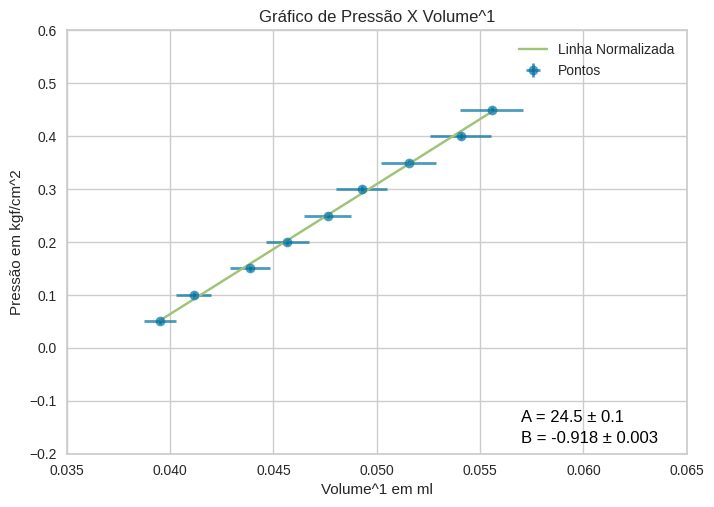

In [120]:
#Main code parte 2 Linearizações

a, b, erro_a, erro_b = MMQ(recip_vol, list_ps, err_recipv)

# Calculando a linha normalizada para os valores de x
linha_normalizada = a * recip_vol + b

#Construindo gráfico linearizado
plt.errorbar(recip_vol, list_ps, xerr = err_recipv, yerr = err_ps, marker='o', linestyle='', label='Pontos', capsize=1, elinewidth=2, alpha = 0.7)

# Adicionando a linha normalizada
plt.plot(recip_vol, linha_normalizada, linestyle='-', label='Linha Normalizada')
#Arrumando legendas
plt.text(0.057,-0.14,'A = 24.5 ± 0.1', fontsize=12, color='black')
plt.text(0.057,-0.18,'B = -0.918 ± 0.003', fontsize=12, color='black')
plt.ylim(-0.2, 0.60)
plt.xlim(0.0350, 0.0650)
plt.xlabel('Volume^1 em ml')
plt.ylabel('Pressão em kgf/cm^2')
plt.title('Gráfico de Pressão X Volume^1')
plt.legend()
#Mostrando gráfico
plt.grid(True)
plt.show

print('Coeficiente a: ', a)
print('Coeficiente b: ', b)
print("Erro associado ao coeficiente angular (Δa):", erro_a)
print("Erro associado ao coeficiente linear (Δb):", erro_b)



Coeficiente a:  [24.57674765]
Coeficiente b:  -0.9194049009208785


<function matplotlib.pyplot.show(close=None, block=None)>

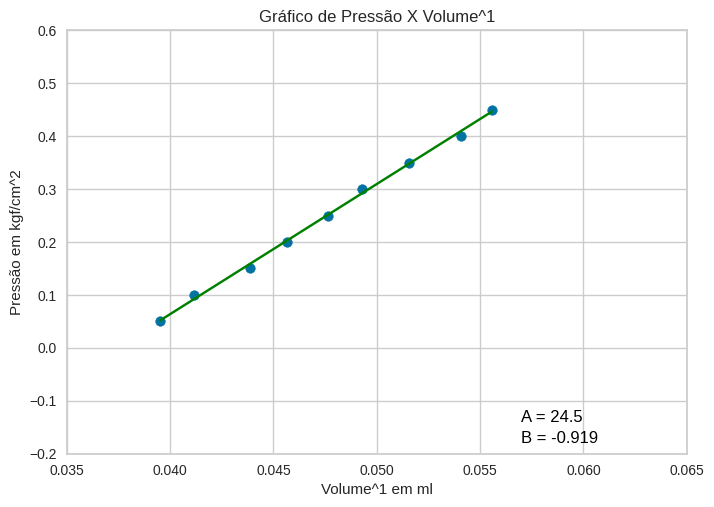

In [118]:
#Regressão Linear
#formato de matriz com uma coluna a mais
recip_vol2 = recip_vol.reshape(-1, 1)

# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(recip_vol2, list_ps)

#inclinacao
a = modelo.coef_
#linha
b = modelo.intercept_

print('Coeficiente a: ', a)
print('Coeficiente b: ', b)

# Geração do gráfico com os pontos reais e as previsões
plt.scatter(recip_vol2, list_ps)
plt.plot(recip_vol2, modelo.predict(recip_vol2), color = 'green')
#Arrumando legendas
plt.text(0.057,-0.14,'A = 24.5', fontsize=12, color='black')
plt.text(0.057,-0.18,'B = -0.919', fontsize=12, color='black')
plt.ylim(-0.2, 0.60)
plt.xlim(0.0350, 0.0650)
plt.xlabel('Volume^1 em ml')
plt.ylabel('Pressão em kgf/cm^2')
plt.title('Gráfico de Pressão X Volume^1')
plt.legend()
#Mostrando gráfico
plt.grid(True)
plt.show
#prevendo o volume para 0.500 de pressão
#modelo.predict([[0.500]])

In [125]:
#Main code Parte 3
p_atm = p_atm(10000000000, a, b)
print('Valor da pressão atm em kgf/cm^2: ', p_atm)

Valor da pressão atm em kgf/cm^2:  0.9184702489550721
